# Project Description – Image classification using CNNs in Keras


##  Data Description:

You are provided with a dataset of images of plant seedlings at various stages of grown. Each image has a filename that is its unique id. The dataset comprises 12 plant species. The goal of the project is to create a classifier capable of determining a plant's species from a photo.


## Dataset:
The dataset can be download from Olympus. The data file names are:
- images.npy
- Label.csv

The original files are from Kaggle. <br>
Due to the large volume of data, the images were converted to images.npy file and the labels are also put into the Labels.csv. <br>
So that you can work on the data/project seamlessly without worrying about the high data volume.


## Context:
Can you differentiate a weed from a crop seedling? <br>
The ability to do so effectively can mean better crop yields and better stewardship of the environment.<br>
The Aarhus University Signal Processing group, in collaboration with University of Southern Denmark, has recently released a dataset containing images of unique plants belonging to 12 species at several growth stages


## Steps and tasks:


1. Import the libraries, load dataset, print shape of data, visualize the images in dataset. (5 Marks)
2. Data Pre-processing: (15 Marks)
a. Normalization.
b. Gaussian Blurring.
c. Visualize data after pre-processing.
3. Make data compatible: (10 Marks)
a. Convert labels to one-hot-vectors.
b. Print the label for y_train[0].
c. Split the dataset into training, testing, and validation set.
(Hint: First split images and labels into training and testing set with test_size = 0.3. Then further split test data
into test and validation set with test_size = 0.5)
d. Check the shape of data, Reshape data into shapes compatible with Keras models if it’s not already. If it’s
already in the compatible shape, then comment in the notebook that it’s already in compatible shape.
4. Building CNN: (15 Marks)
a. Define layers.
b. Set optimizer and loss function. (Use Adam optimizer and categorical crossentropy.)
5. Fit and evaluate model and print confusion matrix. (10 Marks)
6. Visualize predictions for x_test[2], x_test[3], x_test[33], x_test[36], x_test[59]. (5 Marks)


## Import the Libraries

In [1]:
import random
random.seed(0)
import warnings
warnings.filterwarnings("ignore")



#Libraries for graphs
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import numpy as np
import pandas as pd


from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import cv2


from tensorflow.keras.models import Sequential          # Sequential groups a linear stack of layers into a Keras Model
from tensorflow.keras.layers import Conv2D              # Conv2D creates a convolution kernel that is convolved with the layer input to produce a tensor of outputs.
from tensorflow.keras.layers import MaxPooling2D        # Max pooling operation for 2D spatial data.
from tensorflow.keras.layers import Flatten             # Flattens the input. Does not affect the batch size.
from tensorflow.keras.layers import Dense, Dropout      # Dropout: Applies Dropout to the input.
                                                        # Dense: Just your regular densely-connected NN layer.

# Libraries for classification model evaluation
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_curve,roc_auc_score,accuracy_score


## Load Dataset

In [2]:
images = np.load('images.npy')
labels = pd.read_csv('labels.csv')

## Dataset shape

In [3]:
print(images.shape)  

(4750, 128, 128, 3)


**Insights**



- There are 4750 images.    [shape index - 0 ]
- The size of images is 128*128 pixel.  [shape index - 1,2]
     - That is height is 128 and width is 128
- There are three color channels (i.e R,G,B) for all the pixels. [shape index - 3]

In [4]:
print(labels.shape)
print(labels.dtypes)

(4750, 1)
Label    object
dtype: object


- There are 4750 labels for 4750 images
- The labels datatype is object. For classification ,the type should converted to one-hot-vectors.

In [5]:
labels.head()

Label
0  Small-flowered Cranesbill
1  Small-flowered Cranesbill
2  Small-flowered Cranesbill
3  Small-flowered Cranesbill
4  Small-flowered Cranesbill

In [6]:
# shape of single image
print(images[0].shape)

(128, 128, 3)


**Insights**

- The individual images are of size 128 width and 128 height.
- 

In [7]:
print(images[0])

[[[ 35  52  78]
  [ 36  49  76]
  [ 31  45  69]
  ...
  [ 78  95 114]
  [ 76  93 110]
  [ 80  95 109]]

 [[ 33  46  68]
  [ 37  50  73]
  [ 48  65  83]
  ...
  [ 81  96 113]
  [ 74  89 105]
  [ 83  95 109]]

 [[ 34  50  68]
  [ 35  52  72]
  [ 70  85 101]
  ...
  [ 83  97 112]
  [ 79  94 108]
  [ 79  94 107]]

 ...

 [[ 35  50  69]
  [ 42  57  73]
  [ 42  57  72]
  ...
  [ 60  76  92]
  [ 67  81  97]
  [ 64  77  95]]

 [[ 36  52  67]
  [ 48  63  78]
  [ 41  57  73]
  ...
  [ 44  66  83]
  [ 58  76  91]
  [ 57  74  90]]

 [[ 44  58  70]
  [ 43  57  73]
  [ 40  55  72]
  ...
  [ 41  70  92]
  [ 55  78  97]
  [ 61  79  96]]]


**Insights**



Label : ['Small-flowered Cranesbill']


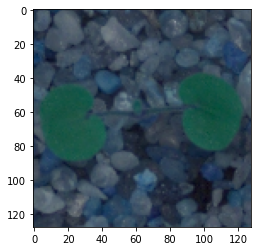

Label : ['Small-flowered Cranesbill']


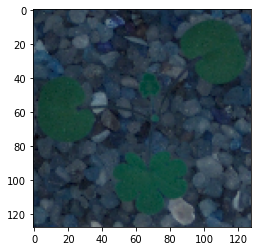

Label : ['Small-flowered Cranesbill']


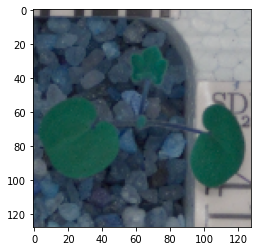

Label : ['Small-flowered Cranesbill']


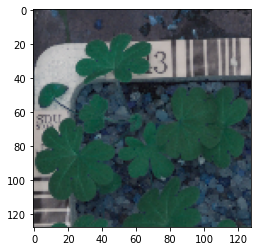

Label : ['Small-flowered Cranesbill']


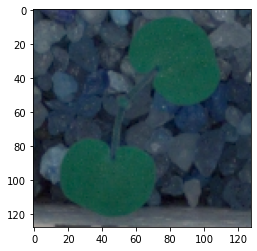

Label : ['Small-flowered Cranesbill']


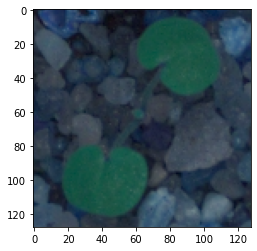

Label : ['Small-flowered Cranesbill']


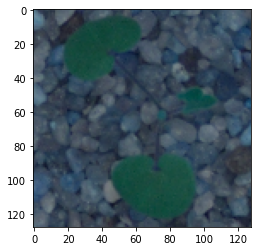

Label : ['Small-flowered Cranesbill']


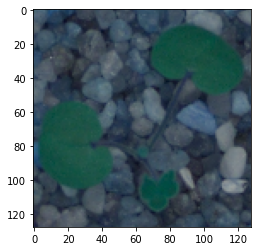

Label : ['Small-flowered Cranesbill']


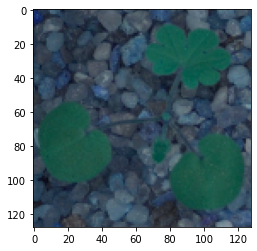

Label : ['Small-flowered Cranesbill']


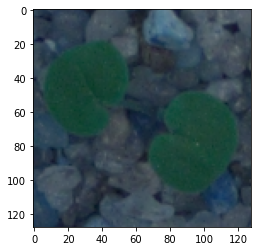

Label : ['Small-flowered Cranesbill']


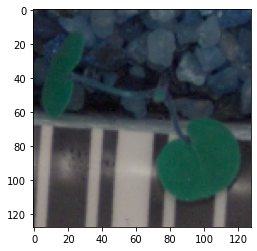

Label : ['Small-flowered Cranesbill']


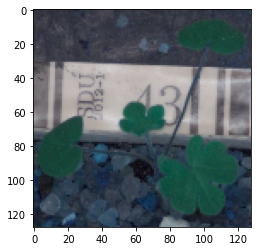

Label : ['Small-flowered Cranesbill']


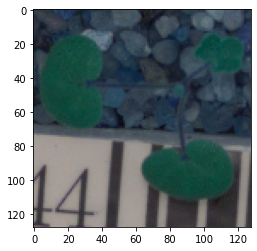

Label : ['Small-flowered Cranesbill']


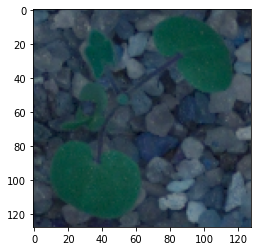

Label : ['Small-flowered Cranesbill']


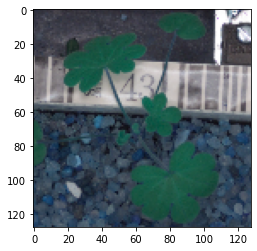

Label : ['Small-flowered Cranesbill']


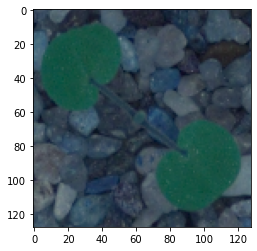

Label : ['Small-flowered Cranesbill']


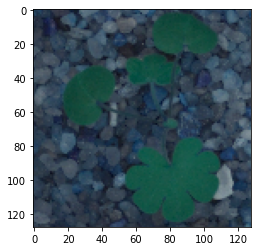

Label : ['Small-flowered Cranesbill']


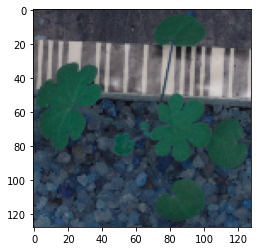

Label : ['Small-flowered Cranesbill']


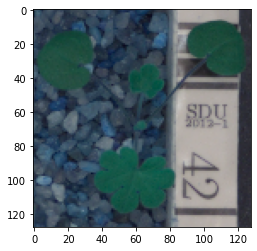

Label : ['Small-flowered Cranesbill']


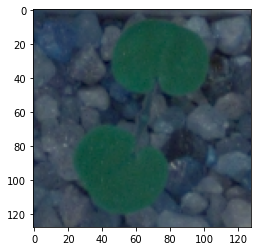

Label : ['Small-flowered Cranesbill']


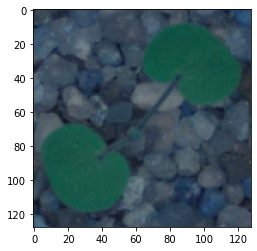

Label : ['Small-flowered Cranesbill']


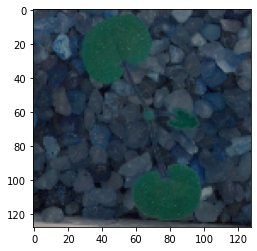

Label : ['Small-flowered Cranesbill']


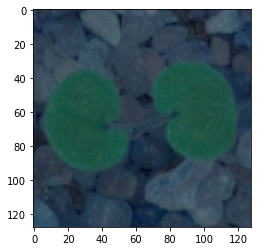

Label : ['Small-flowered Cranesbill']


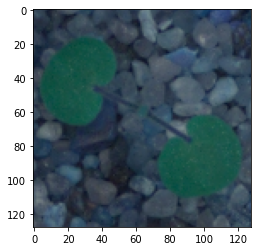

Label : ['Small-flowered Cranesbill']


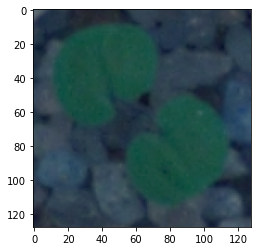

Label : ['Small-flowered Cranesbill']


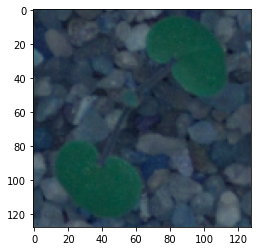

Label : ['Small-flowered Cranesbill']


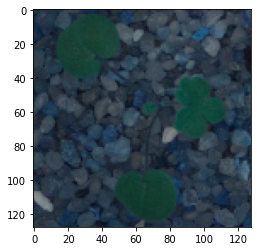

Label : ['Small-flowered Cranesbill']


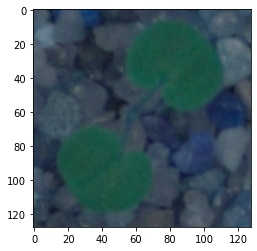

Label : ['Small-flowered Cranesbill']


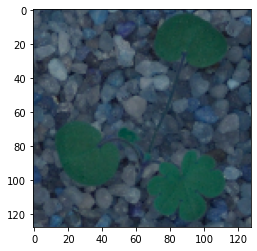

Label : ['Small-flowered Cranesbill']


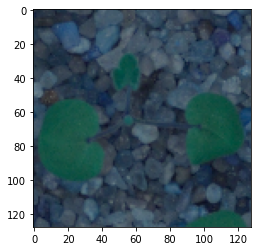

Label : ['Small-flowered Cranesbill']


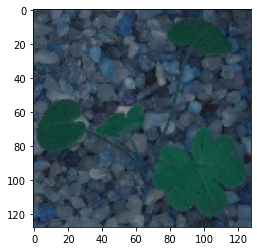

Label : ['Small-flowered Cranesbill']


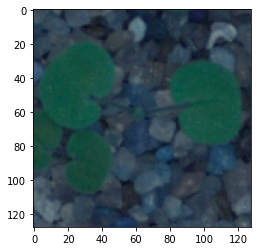

Label : ['Small-flowered Cranesbill']


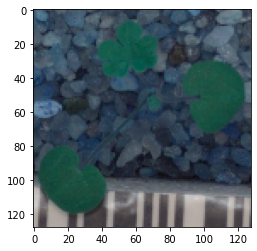

Label : ['Small-flowered Cranesbill']


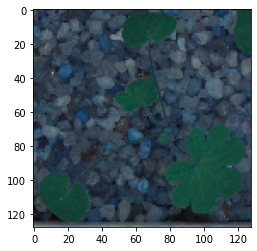

Label : ['Small-flowered Cranesbill']


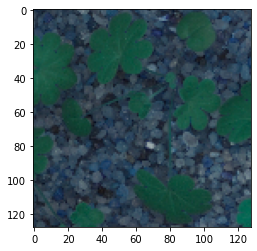

Label : ['Small-flowered Cranesbill']


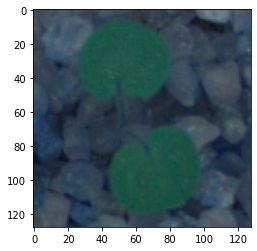

Label : ['Small-flowered Cranesbill']


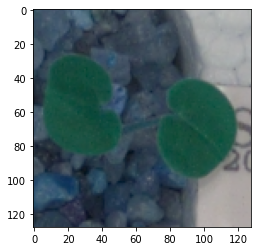

Label : ['Small-flowered Cranesbill']


KeyboardInterrupt: 

In [9]:
i=0
for img in images:
    print(f'Label : {labels.iloc[i].values}')
    i = i+1
    plt.imshow(img)
    plt.show()

### Data Pre-processing

## Display Images

a. Normalization. b. Gaussian Blurring. c. Visualize data after pre-processing.

### Gaussian Blurring

In [8]:
images_blur = []
i = 0
for img in images:
    t = cv2.GaussianBlur(img, (5, 5), 4)
    images_blur.append(t)

In [9]:
images_blur[0]

array([[[ 42,  57,  78],
        [ 45,  60,  80],
        [ 53,  68,  87],
        ...,
        [ 78,  93, 109],
        [ 79,  94, 109],
        [ 79,  94, 110]],

       [[ 41,  57,  78],
        [ 45,  60,  81],
        [ 53,  68,  87],
        ...,
        [ 78,  93, 108],
        [ 79,  94, 109],
        [ 79,  94, 109]],

       [[ 43,  59,  79],
        [ 46,  62,  82],
        [ 54,  70,  89],
        ...,
        [ 78,  92, 107],
        [ 79,  93, 108],
        [ 79,  94, 108]],

       ...,

       [[ 39,  54,  71],
        [ 40,  54,  72],
        [ 40,  55,  72],
        ...,
        [ 54,  71,  90],
        [ 59,  75,  93],
        [ 60,  77,  94]],

       [[ 41,  56,  72],
        [ 42,  56,  73],
        [ 42,  56,  72],
        ...,
        [ 50,  68,  87],
        [ 55,  73,  91],
        [ 57,  75,  93]],

       [[ 42,  57,  73],
        [ 43,  58,  73],
        [ 43,  57,  73],
        ...,
        [ 48,  66,  86],
        [ 54,  72,  90],
        [ 56,  75,  92]]

Label : ['Small-flowered Cranesbill']


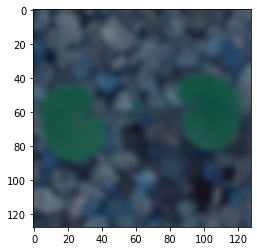

Label : ['Small-flowered Cranesbill']


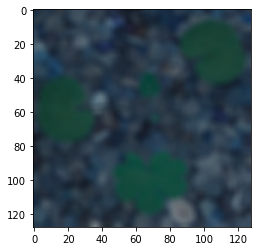

Label : ['Small-flowered Cranesbill']


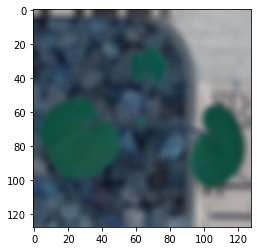

Label : ['Small-flowered Cranesbill']


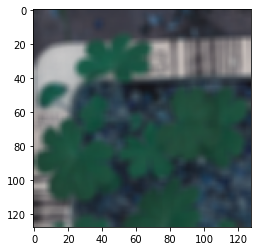

Label : ['Small-flowered Cranesbill']


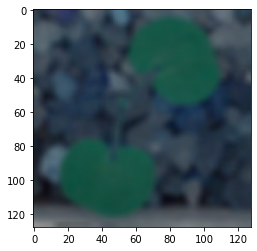

Label : ['Small-flowered Cranesbill']


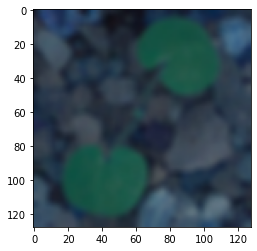

Label : ['Small-flowered Cranesbill']


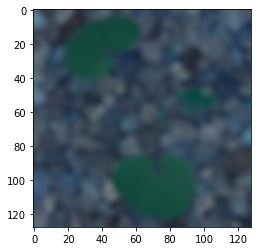

Label : ['Small-flowered Cranesbill']


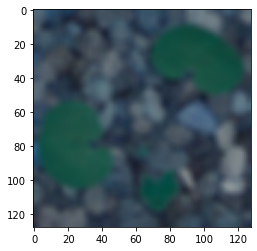

Label : ['Small-flowered Cranesbill']


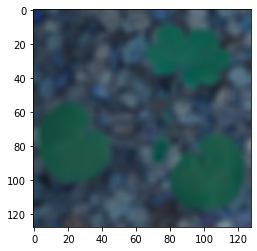

Label : ['Small-flowered Cranesbill']


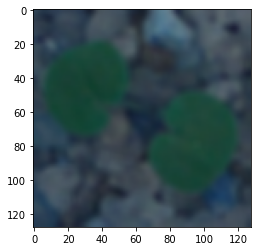

Label : ['Small-flowered Cranesbill']


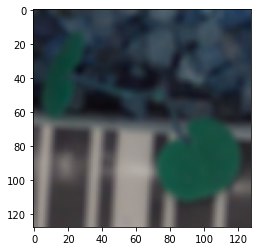

Label : ['Small-flowered Cranesbill']


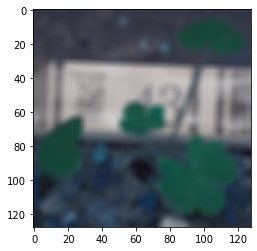

Label : ['Small-flowered Cranesbill']


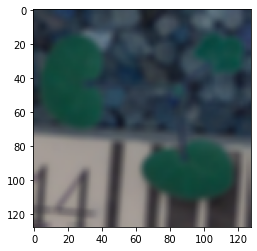

Label : ['Small-flowered Cranesbill']


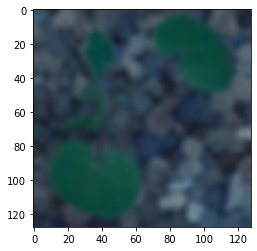

Label : ['Small-flowered Cranesbill']


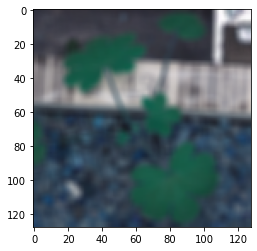

Label : ['Small-flowered Cranesbill']


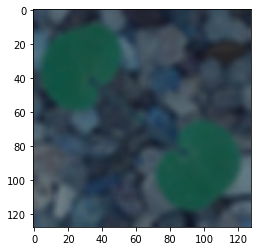

Label : ['Small-flowered Cranesbill']


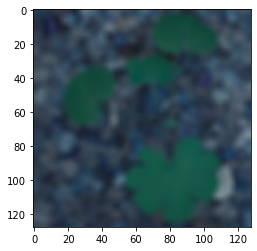

Label : ['Small-flowered Cranesbill']


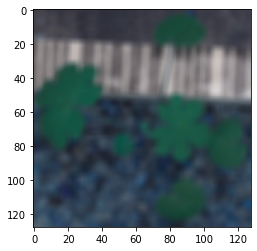

Label : ['Small-flowered Cranesbill']


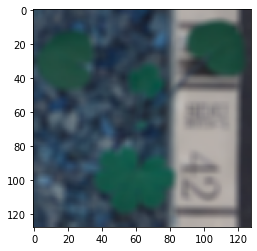

Label : ['Small-flowered Cranesbill']


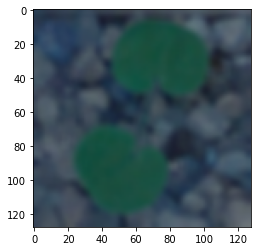

Label : ['Small-flowered Cranesbill']


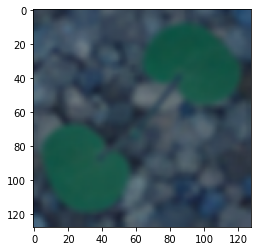

Label : ['Small-flowered Cranesbill']


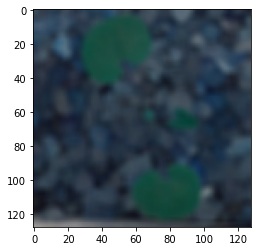

Label : ['Small-flowered Cranesbill']


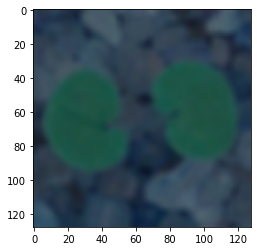

Label : ['Small-flowered Cranesbill']


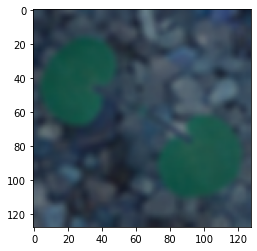

Label : ['Small-flowered Cranesbill']


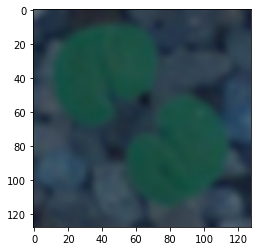

Label : ['Small-flowered Cranesbill']


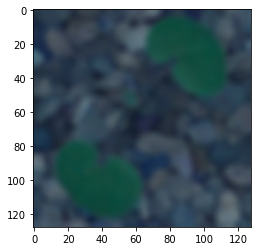

Label : ['Small-flowered Cranesbill']


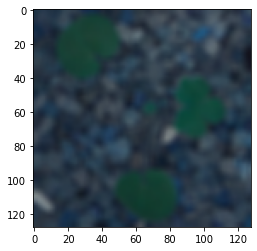

Label : ['Small-flowered Cranesbill']


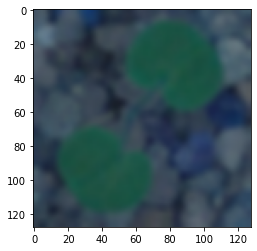

Label : ['Small-flowered Cranesbill']


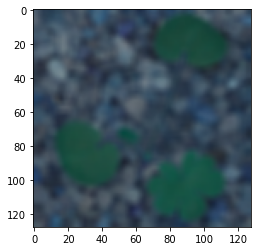

Label : ['Small-flowered Cranesbill']


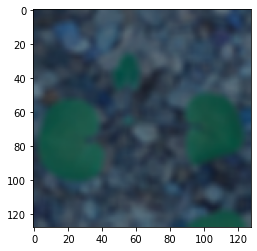

Label : ['Small-flowered Cranesbill']


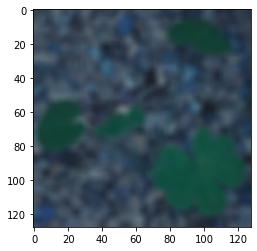

Label : ['Small-flowered Cranesbill']


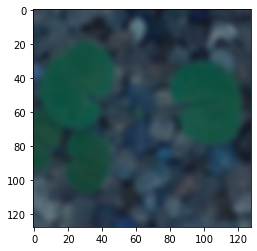

Label : ['Small-flowered Cranesbill']


KeyboardInterrupt: 

In [10]:
i=0
for img in images_blur:
    print(f'Label : {labels.iloc[i].values}')
    i = i+1
    plt.imshow(img)
    plt.show()



### Normalization

In [13]:
images_blur = np.array(images_blur)
images_blur_norm = images_blur.astype('float32')
images_blur_norm /= 255


Label : ['Small-flowered Cranesbill']


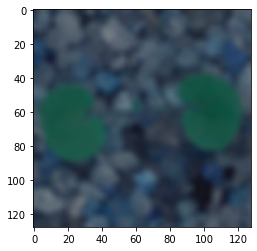

Label : ['Small-flowered Cranesbill']


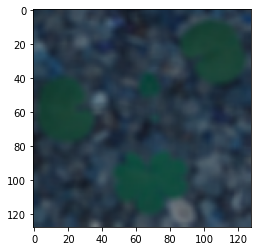

Label : ['Small-flowered Cranesbill']


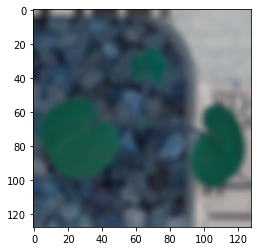

Label : ['Small-flowered Cranesbill']


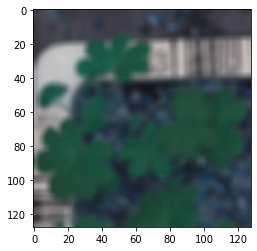

Label : ['Small-flowered Cranesbill']


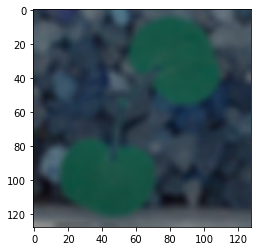

Label : ['Small-flowered Cranesbill']


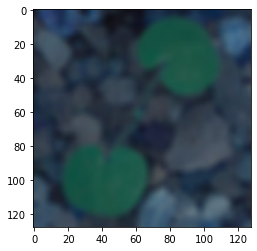

Label : ['Small-flowered Cranesbill']


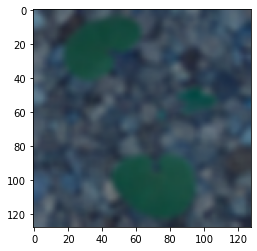

Label : ['Small-flowered Cranesbill']


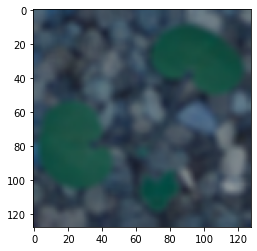

Label : ['Small-flowered Cranesbill']


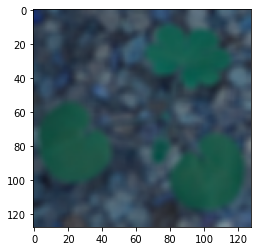

Label : ['Small-flowered Cranesbill']


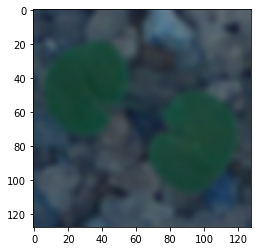

Label : ['Small-flowered Cranesbill']


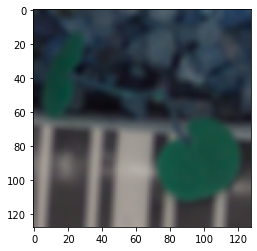

Label : ['Small-flowered Cranesbill']


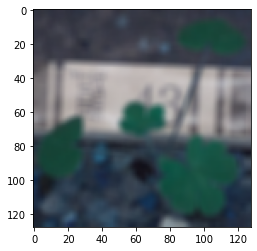

Label : ['Small-flowered Cranesbill']


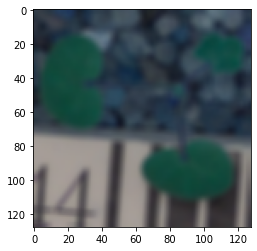

Label : ['Small-flowered Cranesbill']


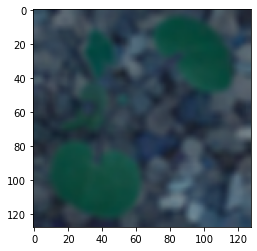

Label : ['Small-flowered Cranesbill']


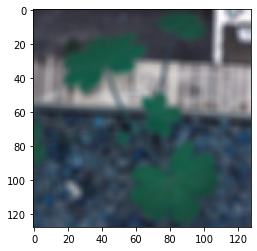

Label : ['Small-flowered Cranesbill']


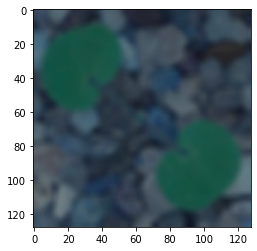

Label : ['Small-flowered Cranesbill']


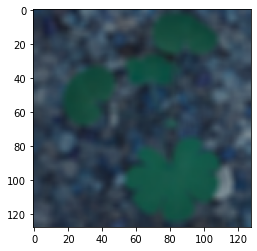

Label : ['Small-flowered Cranesbill']


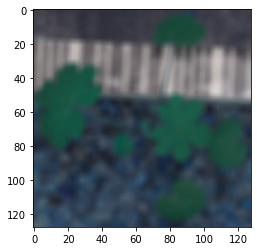

Label : ['Small-flowered Cranesbill']


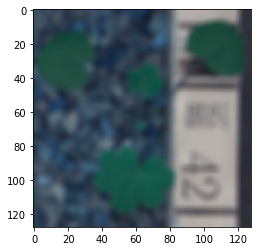

Label : ['Small-flowered Cranesbill']


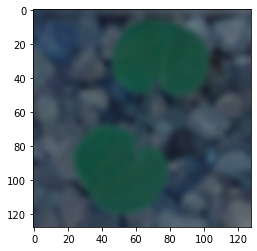

Label : ['Small-flowered Cranesbill']


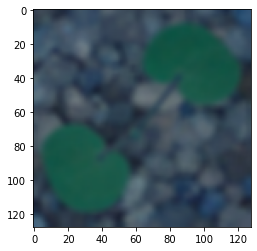

Label : ['Small-flowered Cranesbill']


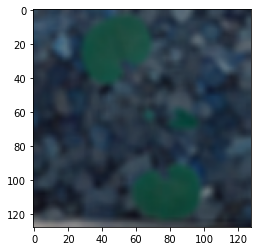

Label : ['Small-flowered Cranesbill']


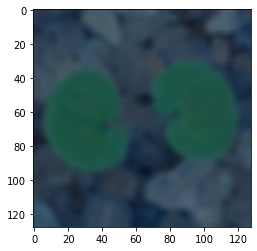

Label : ['Small-flowered Cranesbill']


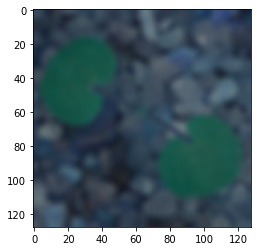

Label : ['Small-flowered Cranesbill']


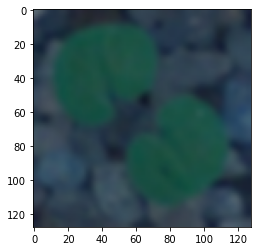

Label : ['Small-flowered Cranesbill']


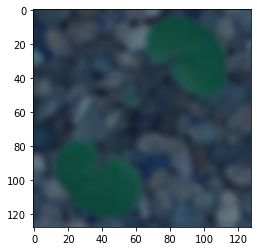

Label : ['Small-flowered Cranesbill']


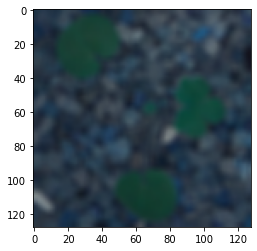

Label : ['Small-flowered Cranesbill']


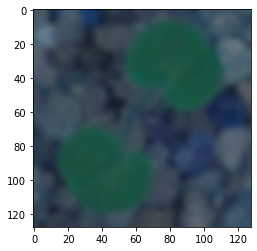

Label : ['Small-flowered Cranesbill']


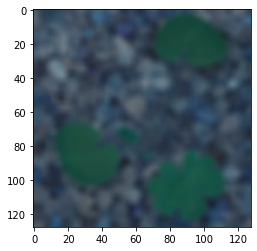

Label : ['Small-flowered Cranesbill']


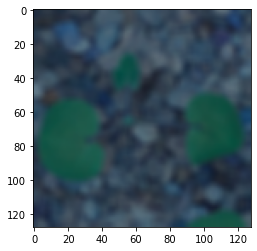

Label : ['Small-flowered Cranesbill']


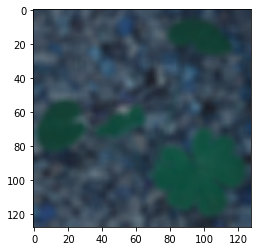

Label : ['Small-flowered Cranesbill']


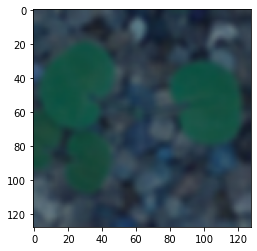

Label : ['Small-flowered Cranesbill']


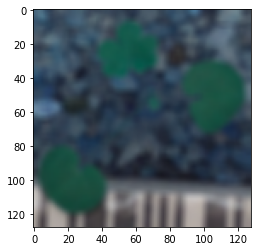

Label : ['Small-flowered Cranesbill']


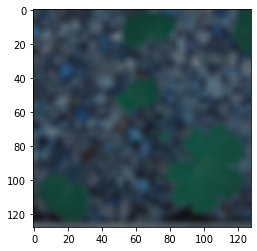

Label : ['Small-flowered Cranesbill']


KeyboardInterrupt: 

In [14]:
i = 0
for img in images_blur_norm:
    print(f'Label : {labels.iloc[i].values}')
    i = i+1
    plt.imshow(img)
    plt.show()
    
    

### Make data compatible

### One-hot encode the class vector
- convert class vectors (integers) to class matrix
- convert y_train and y_test

In [15]:
labels.Label.nunique()

12

In [36]:
labels.Label.unique()

array(['Small-flowered Cranesbill', 'Fat Hen', 'Shepherds Purse',
       'Common wheat', 'Common Chickweed', 'Charlock', 'Cleavers',
       'Scentless Mayweed', 'Sugar beet', 'Maize', 'Black-grass',
       'Loose Silky-bent'], dtype=object)

**Insights**

There are 12 unique labels in the given list.

In [16]:
import pandas as pd

y_pdf = labels
y_pdf = pd.get_dummies(y_pdf)

print(y_pdf.shape)
y_pdf.head()

(4750, 12)


Label_Black-grass  Label_Charlock  Label_Cleavers  Label_Common Chickweed  \
0                  0               0               0                       0   
1                  0               0               0                       0   
2                  0               0               0                       0   
3                  0               0               0                       0   
4                  0               0               0                       0   

   Label_Common wheat  Label_Fat Hen  Label_Loose Silky-bent  Label_Maize  \
0                   0              0                       0            0   
1                   0              0                       0            0   
2                   0              0                       0            0   
3                   0              0                       0            0   
4                   0              0                       0            0   

   Label_Scentless Mayweed  Label_Shepherds Purse  \
0                        0                      0   
1                        0                      0   
2                        0                      0   
3                        0                      0   
4                        0                      0   

   Label_Small-flowered Cranesbill  Label_Sugar beet  
0                                1                 0  
1                                1                 0  
2                                1                 0  
3                                1                 0  
4                                1                 0

In [17]:
y = np.array(y_pdf)  # y labels are converted to vectors.
print(y[0])
print(y.shape)

[0 0 0 0 0 0 0 0 0 0 1 0]
(4750, 12)


In [18]:
print(y[0])

[0 0 0 0 0 0 0 0 0 0 1 0]


In [19]:
y.shape

(4750, 12)

In [64]:
# Split data into training set and test set
Img_train, Img_test, lbl_train, lbl_test = train_test_split(images_blur_norm, y, test_size = 0.3, random_state = 7)

#Split the train set into training set and validation set
Img_val, Img_test, lbl_val ,lbl_test = train_test_split(Img_test, lbl_test, test_size=0.5, random_state=1)

In [65]:
lbl_val

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [21]:
print( "Shape of Img_train: ", Img_train.shape)
print( "Shape of lbl_train: ", lbl_train.shape)

print( "Shape of Img_val: ", Img_val.shape)
print( "Shape of lbl_val: ", lbl_val.shape)

print( "Shape of Img_test: ", Img_test.shape)
print( "Shape of lbl_test: ", lbl_test.shape)

Shape of Img_train:  (3325, 128, 128, 3)
Shape of lbl_train:  (3325, 12)
Shape of Img_val:  (712, 128, 128, 3)
Shape of lbl_val:  (712, 12)
Shape of Img_test:  (713, 128, 128, 3)
Shape of lbl_test:  (713, 12)


**Insights on shape of training, validation and test sets**

- Training data set.

    - 3325 images in Img_train dataset.
    - Images are of dimention 128 h and 128 width
    - 3 (in shape[3]) represents RGB channels
    - Corresponding 3325 labels in lbl_train dataset.
    - labels data set is converted to
    

- Validation data set.

    - 712 images in Img_validation dataset.
    - Corresponding 712 labels in lbl_val dataset.
    - Images are of dimention 128 h and 128 width
    - 3 (in shape[3]) represents RGB channels
    
- test data set.

    - 713 images in Img_test dataset.
    - Corresponding 713 labels in lbl_test dataset.
    - Images are of dimention 128 h and 128 width
    - 3 (in shape[3]) represents RGB channels

## Building CNN: 

### Define layers.

### Model

In [31]:
print(Img_train.shape)
print(lbl_train.shape)
print(Img_val.shape)
print(lbl_val.shape)

(3325, 128, 128, 3)
(3325, 12)
(712, 128, 128, 3)
(712, 12)


In [114]:
# Initialising the CNN classifier
classifier2 = Sequential()

# Add a Convolution layer with 32 kernels of 3X3 shape with activation function ReLU
classifier2.add(Conv2D(64, (3, 3), input_shape = (128, 128, 3), activation = 'relu', padding = 'same'))

# Add a Max Pooling layer of size 2X2
classifier2.add(MaxPooling2D(pool_size = (2, 2)))

# Add another Convolution layer with 32 kernels of 3X3 shape with activation function ReLU
classifier2.add(Conv2D(64, (3, 3), activation = 'relu', padding = 'same'))

# Add a Max Pooling layer of size 2X2
classifier2.add(MaxPooling2D(pool_size = (2, 2)))

# Add another Convolution layer with 32 kernels of 3X3 shape with activation function ReLU
classifier2.add(Conv2D(32, (3, 3), activation = 'relu', padding = 'valid'))

# Adding another pooling layer
classifier2.add(MaxPooling2D(pool_size = (2, 2)))

# Flattening the layer before fully connected layers
classifier2.add(Flatten())

# Adding a fully connected layer with 512 neurons
classifier2.add(Dense(units = 512, activation = 'relu'))

# Adding dropout with probability 0.5
classifier2.add(Dropout(0.5))


# Adding a fully connected layer with 128 neurons
classifier2.add(Dense(units = 128, activation = 'relu'))


# The final output layer with 12 neurons to predict the categorical classifcation
classifier2.add(Dense(units = 12, activation = 'softmax'))

In [115]:
classifier2.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 128, 128, 64)      1792      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 64, 64, 64)        36928     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 30, 30, 32)        18464     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 7200)             

In [131]:
import tensorflow.keras.callbacks

# Compile the model
classifier2.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

# Fit the model
history2 = classifier2.fit(x=Img_train, y=lbl_train, batch_size=32, epochs=10, validation_data=(Img_val, lbl_val))

Epoch 1/10
104/104 [==============================] - 36s 346ms/step - loss: 0.0994 - accuracy: 0.9663 - val_loss: 1.2630 - val_accuracy: 0.7781
Epoch 2/10
104/104 [==============================] - 38s 367ms/step - loss: 0.0721 - accuracy: 0.9741 - val_loss: 1.6807 - val_accuracy: 0.7458
Epoch 3/10
104/104 [==============================] - 41s 393ms/step - loss: 0.1045 - accuracy: 0.9660 - val_loss: 1.1527 - val_accuracy: 0.7542
Epoch 4/10
104/104 [==============================] - 38s 364ms/step - loss: 0.0874 - accuracy: 0.9729 - val_loss: 1.1051 - val_accuracy: 0.7823
Epoch 5/10
104/104 [==============================] - 38s 363ms/step - loss: 0.1013 - accuracy: 0.9663 - val_loss: 1.1585 - val_accuracy: 0.7809
Epoch 6/10
104/104 [==============================] - 38s 368ms/step - loss: 0.0843 - accuracy: 0.9750 - val_loss: 1.3240 - val_accuracy: 0.7683
Epoch 7/10
104/104 [==============================] - 39s 379ms/step - loss: 0.0875 - accuracy: 0.9702 - val_loss: 1.4057 - val_ac

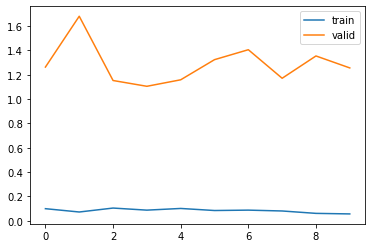

In [133]:
# Capturing learning history per epoch
hist2  = pd.DataFrame(history2.history)
hist2['epoch'] = history2.epoch

# Plotting accuracy at different epochs
plt.plot(hist2['loss'])
plt.plot(hist2['val_loss'])
plt.legend(("train" , "valid") , loc = 0)

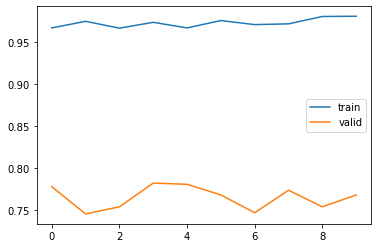

In [134]:
# Capturing recall per epoch
hist2  = pd.DataFrame(history2.history)
hist2['epoch'] = history2.epoch

# Plotting recall at different epochs
plt.plot(hist2['accuracy'])
plt.plot(hist2['val_accuracy'])
plt.legend(("train" , "valid") , loc =0)

In [103]:

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    '''
    #( accuracy, precision, recall, f1_score ) = (0,0,0,0)

    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')
        
    

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)


(712, 12)
range(0, 712)


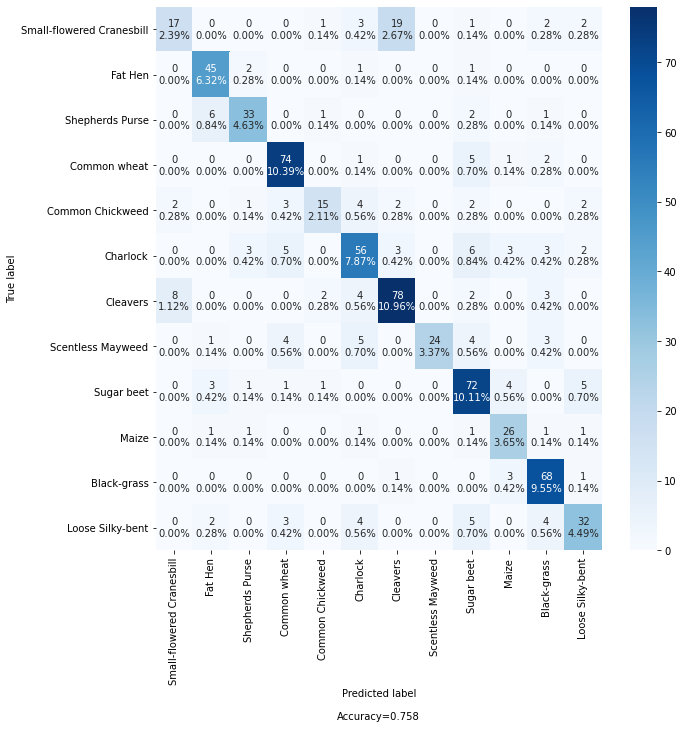

In [125]:
import seaborn as sn
y_pred1 = classifier2.predict(Img_val)

print(y_pred1.shape)
print(range(len(y_pred2)))

y_pred2 = np.zeros(shape=(y_pred1.shape[0],12))
for i in range(len(y_pred1)):
    max_ind = np.argmax(y_pred1[i])
    for j in range(12):
        if(j == max_ind):
            y_pred2[i][j] = int(1)
        else:
            y_pred2[i][j] = int(0)
            

y_pred2 = y_pred2.astype(int)        
    


#cm1 = confusion_matrix(lbl_val, y_pred2)

cm1 = confusion_matrix(lbl_val.argmax(axis=1), y_pred2.argmax(axis=1))

labels = ['True Negative','False Positive','False Negative','True Positive']

categories = ['Small-flowered Cranesbill', 'Fat Hen', 'Shepherds Purse',
       'Common wheat', 'Common Chickweed', 'Charlock', 'Cleavers',
       'Scentless Mayweed', 'Sugar beet', 'Maize', 'Black-grass',
       'Loose Silky-bent']


make_confusion_matrix(cm1, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues', figsize =(10,10))

